In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from collections import Counter

from sklearn.decomposition import PCA
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix 

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectFromModel

from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

In [77]:
df = pd.read_csv(r"c:\Users\user\Desktop\Учёба\3 курс\Проект по ПП\Датасеты\TCGA-PRAD\csv\df_patient_operation_with_status.csv")

In [5]:
df.head()

,Unnamed: 0,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,status
0,0,3026,0,894,542,41,70,373,3124,985,...,0,6,0,0,0,108,0,3,35,0
1,1,3089,1,1836,847,161,234,473,4509,2808,...,0,9,0,0,0,299,0,5,21,0
2,2,3089,1,1836,847,161,234,473,4509,2808,...,0,9,0,0,0,299,0,5,21,0
3,3,3089,1,1836,847,161,234,473,4509,2808,...,0,9,0,0,0,299,0,5,21,0
4,4,3089,1,1836,847,161,234,473,4509,2808,...,0,9,0,0,0,299,0,5,21,0


In [78]:
df=df.drop(columns=['Unnamed: 0'])

In [7]:
df.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,status
0,3026,0,894,542,41,70,373,3124,985,567,...,0,6,0,0,0,108,0,3,35,0
1,3089,1,1836,847,161,234,473,4509,2808,2105,...,0,9,0,0,0,299,0,5,21,0
2,3089,1,1836,847,161,234,473,4509,2808,2105,...,0,9,0,0,0,299,0,5,21,0
3,3089,1,1836,847,161,234,473,4509,2808,2105,...,0,9,0,0,0,299,0,5,21,0
4,3089,1,1836,847,161,234,473,4509,2808,2105,...,0,9,0,0,0,299,0,5,21,0


In [79]:
# Статус 0 - после операционного лечения не было рецидива, статус 1 - после операционного лечения был рецидив
df['status'].unique()

array([0, 1], dtype=int64)

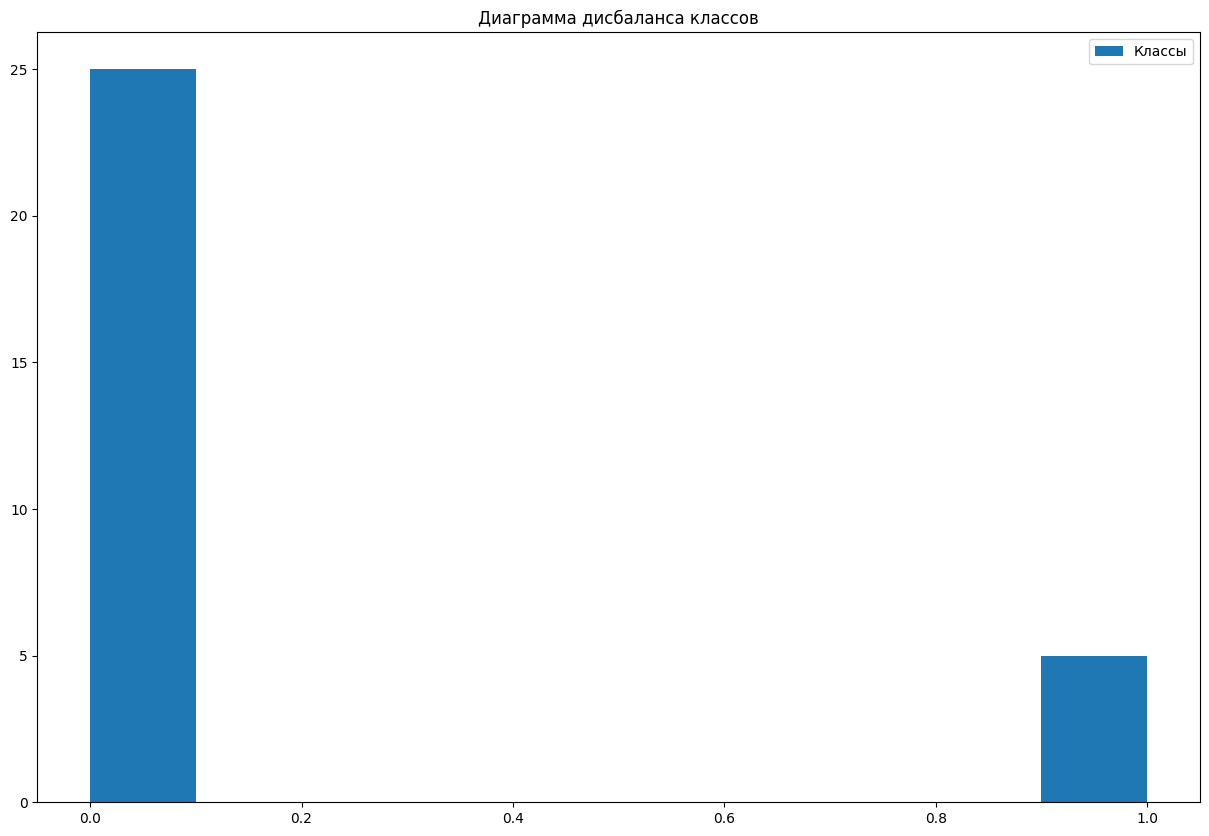

In [80]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.hist(df['status'])

# Title to the plot
plt.title("Диаграмма дисбаланса классов")

# Adding the legends
plt.legend(["Классы"])
plt.show()

В случае рецидива раковых опухолей после операционного лечения дисбаланс классов естественнен, случаев рецидива всегда меньше, чем случаев полной ремиссии, поэтому данные не нужно корректировать.

In [83]:
df_1 = df.loc[df['status']==1]
df_1 = df_1.loc[df_1.index.repeat(5)]
df = pd.concat([df.loc[df['status']==0], df_1]).sample(frac=1)

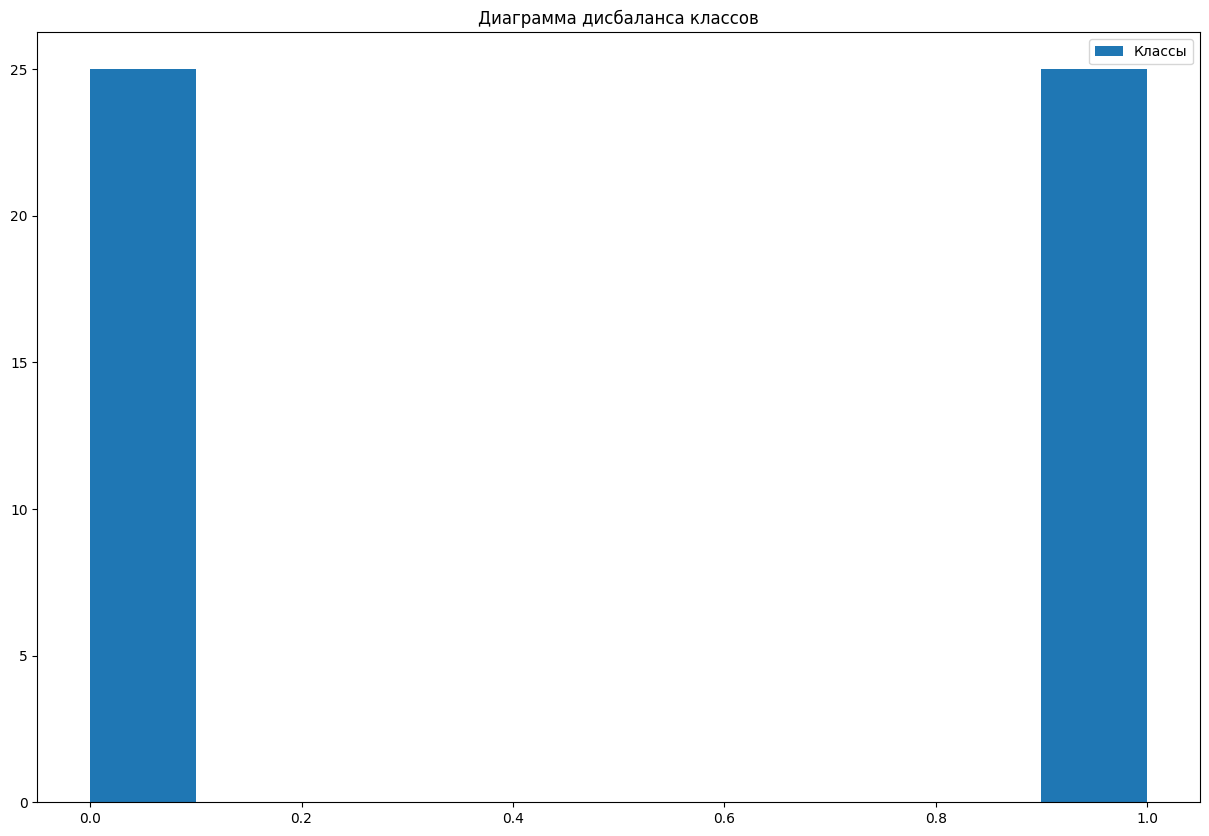

In [84]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.hist(df['status'])

# Title to the plot
plt.title("Диаграмма дисбаланса классов")

# Adding the legends
plt.legend(["Классы"])
plt.show()

Random Forest

In [85]:
# В столбце 'status' содержится информация о рецидиве
X = df.drop(columns=['status'])  # Признаки (экспрессия генов)
y = df['status']  # Целевая переменная (рецидив)
df = df.sample(frac=1)
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [49]:
df.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,status
12,3559,2,981,1301,180,151,539,1863,1318,1946,...,1,9,0,0,0,212,0,2,15,0
10,1650,6,869,427,69,105,550,1627,1670,1341,...,0,5,0,0,0,208,0,1,5,0
9,1595,5,453,185,62,172,280,1951,861,645,...,0,0,0,0,0,125,0,0,60,0
24,3624,55,1711,808,167,243,1976,1516,3522,1939,...,0,3,0,0,0,327,0,1,8,0
4,3089,1,1836,847,161,234,473,4509,2808,2105,...,0,9,0,0,0,299,0,5,21,0


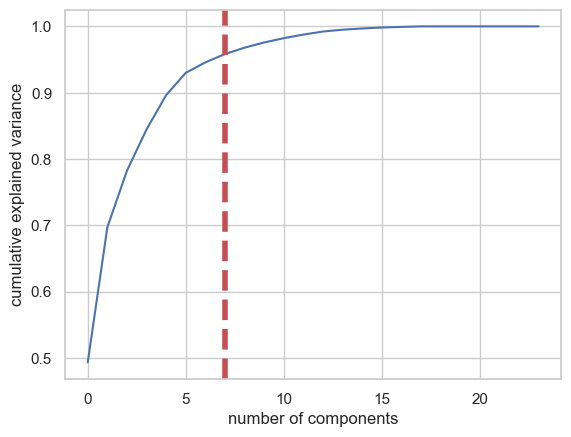

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.493175,4.931752e-01
1,0.696909,2.037341e-01
2,0.782213,8.530408e-02
3,0.844634,6.242023e-02
4,0.896377,5.174325e-02
5,0.929968,3.359143e-02
6,0.945665,1.569655e-02
7,0.958308,1.264274e-02
8,0.967876,9.568105e-03
9,0.975767,7.891050e-03


In [50]:
# Уменьшение размерности данных
pca_test = PCA(n_components=24)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=7, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(20))

Более 95% выявляется при 7 признаках, поэтому этого числа достаточно

In [51]:
pca = PCA(n_components=7)
pca.fit(X_train)
X_train_scaled_pca = pca.transform(X_train)
X_test_scaled_pca = pca.transform(X_test)

Так как нам для моделей в результате надо будет получить значимость отдельных генов, а метод PCA их не созраняет, то измененные им данные не подойдут для обучения.

In [10]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

1.0

In [11]:
# Найдем оптимальные параметры для модели Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc,
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 700,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'bootstrap': False}

In [95]:
# Обучение модели
model = RandomForestClassifier(n_estimators=700, random_state=42, max_features='sqrt', max_depth=2, min_samples_split=2, min_samples_leaf=20, bootstrap=False)
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Получение важности признаков
importances = model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Вывод важности генов
print("Важность генов:")
print(feature_importances)

Accuracy: 0.8
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10

Важность генов:
                    importance
ENSG00000284626.1     0.007143
ENSG00000272861.1     0.007143
ENSG00000287777.1     0.005714
ENSG00000135821.19    0.005714
ENSG00000267940.1     0.005714
...                        ...
ENSG00000206178.2     0.000000
ENSG00000206181.6     0.000000
ENSG00000206187.4     0.000000
ENSG00000206190.12    0.000000
ENSG00000288675.1     0.000000

[60660 rows x 1 columns]


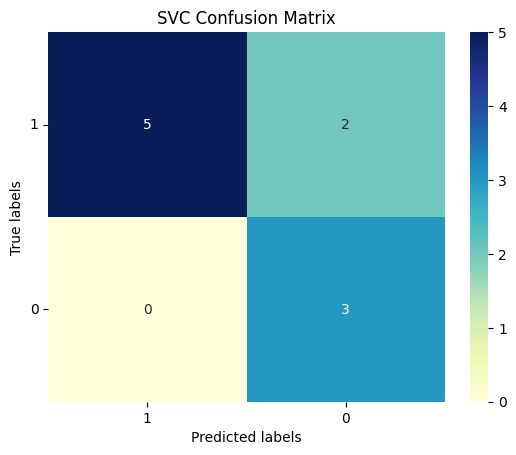

In [96]:
cm_rf = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='YlGnBu') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVC Confusion Matrix') 
ax.xaxis.set_ticklabels(df['status'].unique()) 
ax.yaxis.set_ticklabels(df['status'].unique(), rotation=360);

SVC

In [98]:
# Настройка гиперпараметров модели
svm = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm, param_grid)
grid.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [ ]:
# Лучшие параметры модели
print(grid.best_params_)
print(grid.best_estimator_.get_params())

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [99]:
# Точность модели
grid_svc = grid.predict(X_test)
print(accuracy_score(y_test, grid_svc))
print(classification_report(y_test, grid_svc))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



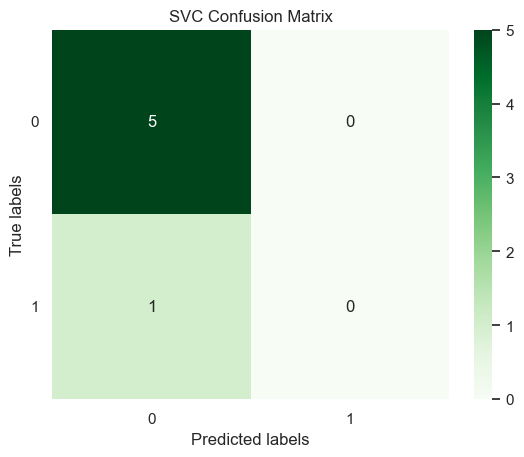

In [ ]:
cm_svc = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm_svc, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVC Confusion Matrix') 
ax.xaxis.set_ticklabels(df['status'].unique()) 
ax.yaxis.set_ticklabels(df['status'].unique(), rotation=360);